## Imports

In [16]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Read and merge data

In [17]:
import pandas as pd

# Load base dataset
df = pd.read_csv(r"D:\Downloads\MIA\Task2\archive\results.csv")

# Load and merge status (we want full info here)
status = pd.read_csv(r"D:\Downloads\MIA\Task2\archive\status.csv")
df = df.merge(status, on='statusId', how='left')

# Load and merge ONLY needed columns from drivers
drivers = pd.read_csv(r"D:\Downloads\MIA\Task2\archive\drivers.csv")
drivers['driver_name'] = drivers['forename'] + ' ' + drivers['surname']
df = df.merge(drivers[['driverId', 'driver_name']], on='driverId', how='left')

# Load and merge ONLY needed column from constructors
constructors = pd.read_csv(r"D:\Downloads\MIA\Task2\archive\constructors.csv")
df = df.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
df = df.rename(columns={'name': 'constructor_name'})

races=pd.read_csv(r"D:\Downloads\MIA\Task2\archive\races.csv")
df = df.merge(races[['raceId', 'year']], on='raceId', how='left')
df = df.rename(columns={'year' : 'season'})



## Preprossessing 

In [18]:
print("Nulls")
print(df.isnull().sum() )
print("Duplicates")
print(df.duplicated().sum())


Nulls
resultId            0
raceId              0
driverId            0
constructorId       0
number              0
grid                0
position            0
positionText        0
positionOrder       0
points              0
laps                0
time                0
milliseconds        0
fastestLap          0
rank                0
fastestLapTime      0
fastestLapSpeed     0
statusId            0
status              0
driver_name         0
constructor_name    0
season              0
dtype: int64
Duplicates
0


will not remove outliers because we will need it in analysis

In [19]:

# Check outliers for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"{col}: {len(outliers)} outliers")
    



resultId: 0 outliers
raceId: 0 outliers
driverId: 0 outliers
constructorId: 3229 outliers
grid: 0 outliers
positionOrder: 47 outliers
points: 3873 outliers
laps: 254 outliers
statusId: 3830 outliers
season: 0 outliers


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   resultId          26759 non-null  int64  
 1   raceId            26759 non-null  int64  
 2   driverId          26759 non-null  int64  
 3   constructorId     26759 non-null  int64  
 4   number            26759 non-null  object 
 5   grid              26759 non-null  int64  
 6   position          26759 non-null  object 
 7   positionText      26759 non-null  object 
 8   positionOrder     26759 non-null  int64  
 9   points            26759 non-null  float64
 10  laps              26759 non-null  int64  
 11  time              26759 non-null  object 
 12  milliseconds      26759 non-null  object 
 13  fastestLap        26759 non-null  object 
 14  rank              26759 non-null  object 
 15  fastestLapTime    26759 non-null  object 
 16  fastestLapSpeed   26759 non-null  object

In [21]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status,driver_name,constructor_name,season
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,Finished,Lewis Hamilton,McLaren,2008
1,2,18,2,2,3,5,2,2,2,8.0,...,5696094,41,3,1:27.739,217.586,1,Finished,Nick Heidfeld,BMW Sauber,2008
2,3,18,3,3,7,7,3,3,3,6.0,...,5698779,41,5,1:28.090,216.719,1,Finished,Nico Rosberg,Williams,2008
3,4,18,4,4,5,11,4,4,4,5.0,...,5707797,58,7,1:28.603,215.464,1,Finished,Fernando Alonso,Renault,2008
4,5,18,5,1,23,3,5,5,5,4.0,...,5708630,43,1,1:27.418,218.385,1,Finished,Heikki Kovalainen,McLaren,2008


## Making some important features 

In [22]:
df['positions_diff'] = df['positionOrder'] - df['grid']
df['finished'] = df['status'] == 'Finished'
df['decade'] = (df['season'] // 10) * 10


## Exploring Real DNFs causes 

In [23]:
df['status'].unique() #seeing what we can consider DNF statuses

array(['Finished', '+1 Lap', 'Engine', 'Collision', 'Accident',
       'Transmission', 'Clutch', 'Electrical', 'Hydraulics',
       'Disqualified', '+2 Laps', 'Spun off', 'Gearbox', 'Radiator',
       'Suspension', '+4 Laps', 'Brakes', '+3 Laps', 'Overheating',
       'Mechanical', 'Tyre', 'Driver Seat', 'Puncture', 'Driveshaft',
       'Retired', 'Fuel pressure', 'Front wing', 'Water pressure',
       'Refuelling', 'Wheel', 'Throttle', 'Steering', 'Technical',
       'Electronics', 'Broken wing', 'Heat shield fire', 'Exhaust',
       'Oil leak', '+11 Laps', 'Wheel rim', 'Water leak', 'Fuel pump',
       'Track rod', '+5 Laps', '+17 Laps', 'Oil pressure', 'Pneumatics',
       'Withdrew', '+12 Laps', '+7 Laps', 'Engine fire', '+26 Laps',
       'Tyre puncture', 'Out of fuel', 'Wheel nut', 'Not classified',
       '+6 Laps', '+8 Laps', 'Handling', 'Rear wing', 'Fire',
       'Fuel system', 'Oil line', 'Fuel rig', 'Launch control', 'Injured',
       'Fuel', 'Power loss', '107% Rule', 'Saf

In [24]:
real_dnf_keywords = [
    'Engine', 'Collision', 'Accident', 'Transmission', 'Clutch', 'Electrical', 
    'Hydraulics', 'Spun off', 'Gearbox', 'Radiator', 'Suspension', 'Brakes', 
    'Overheating', 'Mechanical', 'Tyre', 'Driveshaft', 'Fuel pressure', 
    'Water pressure', 'Wheel', 'Throttle', 'Steering', 'Technical', 
    'Electronics', 'Broken wing', 'Heat shield fire', 'Exhaust', 'Oil leak', 
    'Oil pressure', 'Pneumatics', 'Fuel pump', 'Track rod', 'Engine fire', 
    'Out of fuel', 'Wheel nut', 'Rear wing', 'Fire', 'Fuel system', 
    'Oil line', 'Launch control', 'Power loss', 'Drivetrain', 'Ignition',
    'Battery', 'Stalled', 'Halfshaft', 'Crankshaft', 'Alternator', 
    'Differential', 'Wheel bearing', 'Vibrations', 'Oil pump', 
    'Fuel leak', 'Injection', 'Distributor', 'Turbo', 'CV joint', 
    'Water pump', 'Fatal accident', 'Spark plugs', 'Fuel pipe', 
    'Oil pipe', 'Axle', 'Water pipe', 'Magneto', 'Engine misfire', 
    'Collision damage', 'ERS', 'Power Unit', 'Brake duct', 'Cooling system'
]


In [25]:
dnfs = df[df['status'].isin(real_dnf_keywords)]


## Descriptive Statistics

In [26]:
decade_performance = df.groupby('decade').agg({
    'raceId': 'nunique',          
    'points': ['sum', 'mean'],
    'grid': 'mean',
    'positionOrder': 'mean',
    'positions_diff': 'mean',
    'finished': 'mean'            
}).round(3)

decade_performance.columns = [
    'races', 'total_points', 'avg_points',
    'avg_grid', 'avg_finish', 'avg_positions_diff', 'finish_rate'
]

decade_performance['finish_rate'] = (decade_performance['finish_rate'] * 100).round(2)


In [27]:
driver_stats = df.groupby(['driver_name']).agg({
    'raceId': 'nunique',          
    'points': ['sum', 'mean'],
    'grid': 'mean',
    'positionOrder': 'mean',
    'positions_diff': 'mean',
    'finished': 'mean'             
}).round(3)

driver_stats.columns = [
    'races', 'total_points', 'avg_points',
    'avg_grid', 'avg_finish', 'avg_positions_diff', 'finish_rate'
]
driver_stats['finish_rate'] = (driver_stats['finish_rate'] * 100).round(2)

driver_dnfs = dnfs.groupby('driver_name').size().reset_index(name='dnfs')
driver_stats = driver_stats.merge(driver_dnfs, on='driver_name', how='left')
driver_stats['dnfs'] = driver_stats['dnfs'].fillna(0).astype(int)

In [28]:

race_stats = df.groupby('raceId').agg(
    drivers_started=('driver_name', 'count'),
    drivers_finished=('finished', 'sum'),
    total_points_awarded=('points', 'sum'),
   
    avg_positions_diff=('positions_diff', 'mean')
).reset_index()


race_dnfs = dnfs.groupby('raceId').size().reset_index(name='dnfs')
race_stats = race_stats.merge(race_dnfs, on='raceId', how='left')
race_stats['dnfs'] = race_stats['dnfs'].fillna(0).astype(int)
race_stats['finish_rate'] = race_stats['drivers_finished'] / race_stats['drivers_started']

In [29]:
driverperdecade = df.groupby(['driver_name', 'decade']).agg({
    'raceId': 'nunique',          
    'points': ['sum', 'mean'],
    'grid': 'mean',
    'positionOrder': 'mean',
    'positions_diff': 'mean',
    'finished': 'mean'             
}).round(3)
driverperdecade.columns = [
    'races', 'total_points', 'avg_points',
    'avg_grid', 'avg_finish', 'avg_positions_diff', 'finish_rate'
]



driverperdecade['finish_rate'] = (driverperdecade['finish_rate'] * 100).round(2)

## Era Comparison

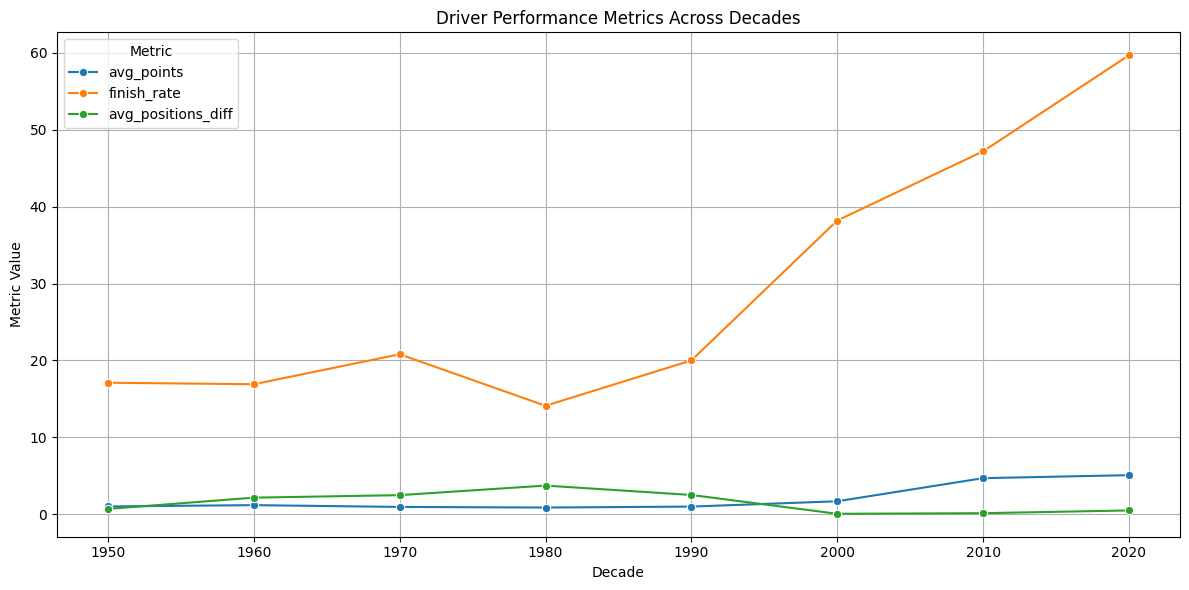

In [30]:

decade_perfomance_reset = decade_performance.reset_index()


melted = pd.melt(decade_perfomance_reset, id_vars='decade', 
                 value_vars=['avg_points', 'finish_rate', 'avg_positions_diff'],
                 var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted, x='decade', y='Value', hue='Metric', marker='o')
plt.title('Driver Performance Metrics Across Decades')
plt.grid(True)
plt.ylabel('Metric Value')
plt.xlabel('Decade')
plt.tight_layout()
plt.show()


## Top Performers

C:\Users\Maram allah\AppData\Local\Temp\ipykernel_14380\943886343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_points', y='driver_name',data=top10, palette='viridis')


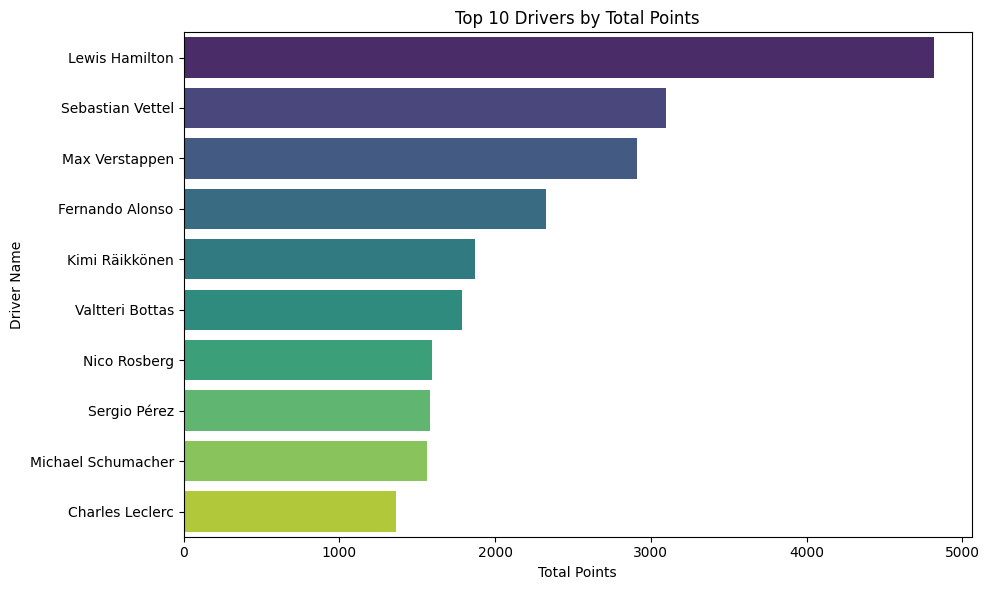

In [31]:
top10 = driver_stats.sort_values('total_points', ascending=False).head(10)


plt.figure(figsize=(10,6))
sns.barplot(x='total_points', y='driver_name',data=top10, palette='viridis')
plt.title('Top 10 Drivers by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Driver Name')
plt.tight_layout()
plt.show()


C:\Users\Maram allah\AppData\Local\Temp\ipykernel_14380\1320080021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='finish_rate', y='driver_name',data=consistent, palette='crest')


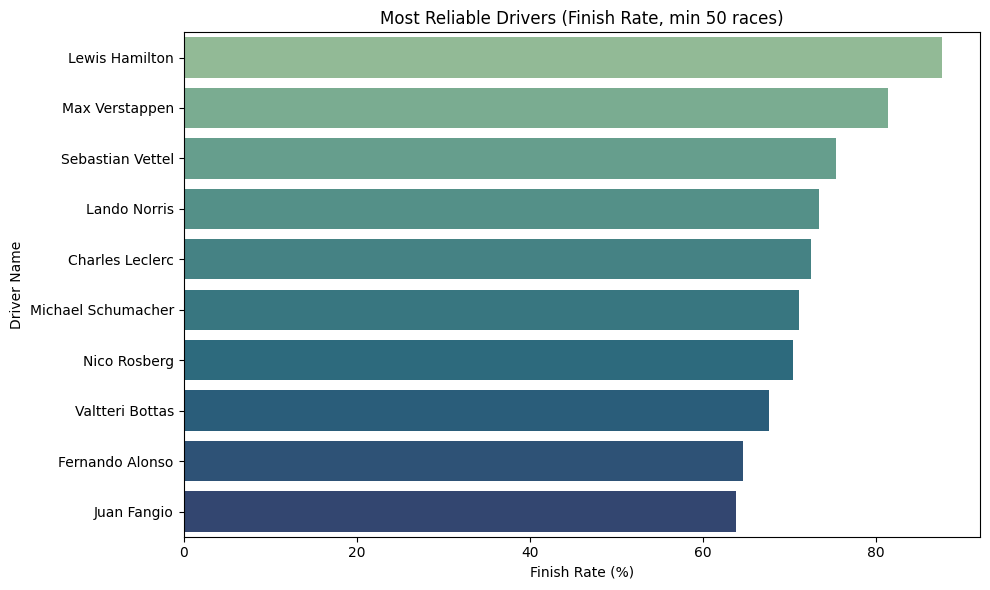

In [32]:
consistent = driver_stats[driver_stats['races'] >= 50].sort_values('finish_rate', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='finish_rate', y='driver_name',data=consistent, palette='crest')
plt.title('Most Reliable Drivers (Finish Rate, min 50 races)')
plt.xlabel('Finish Rate (%)')
plt.ylabel('Driver Name')
plt.tight_layout()
plt.show()


## Era comparison for top 20 drivers by points 

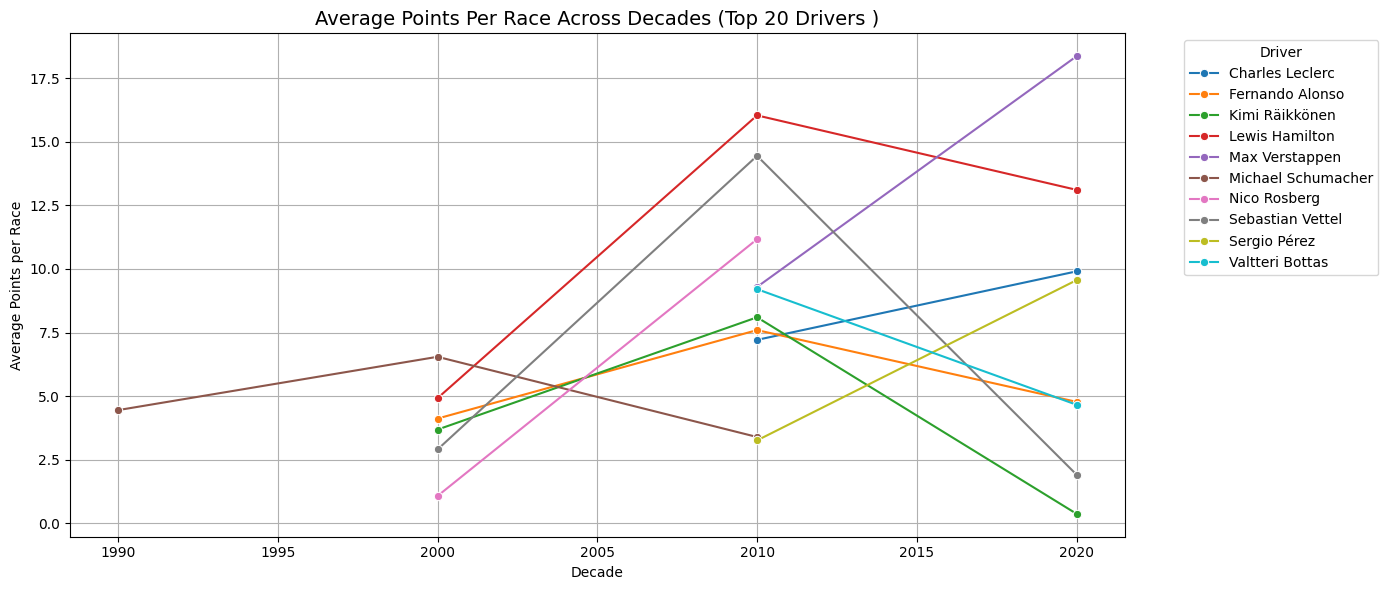

In [33]:


top10_drivers = (
    driverperdecade.groupby('driver_name')['total_points']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top10_data = driverperdecade.reset_index()
top10_data = top10_data[top10_data['driver_name'].isin(top10_drivers)]

# Step 3: Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=top10_data,
    x='decade',
    y='avg_points',
    hue='driver_name',
    marker='o',
    palette='tab10'  
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Driver')

plt.title('Average Points Per Race Across Decades (Top 20 Drivers )', fontsize=14)
plt.xlabel('Decade')
plt.ylabel('Average Points per Race')
plt.grid(True)
plt.tight_layout()
plt.show()


## Team Efficiency

In [34]:
constructor_stats = df.groupby('constructorId').agg(
    total_points=('points', 'sum'),
    race_starts=('raceId', 'count')  # count how many times each constructor participated
)

constructor_stats['points_per_start'] = constructor_stats['total_points'] / constructor_stats['race_starts']


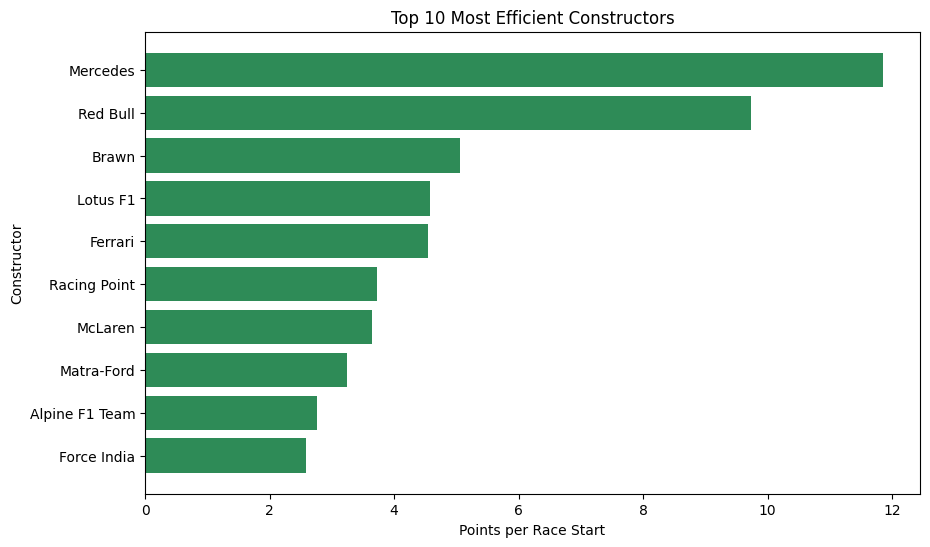

In [35]:
top10_eff = constructor_stats.sort_values('points_per_start', ascending=False).head(10)


top10_eff_named = top10_eff.merge(
    df[['constructorId','constructor_name']].drop_duplicates(),
    left_index=True, right_on='constructorId'
)

plt.figure(figsize=(10,6))
plt.barh(top10_eff_named['constructor_name'], top10_eff_named['points_per_start'], color='seagreen')
plt.xlabel("Points per Race Start")
plt.ylabel("Constructor")
plt.title("Top 10 Most Efficient Constructors")
plt.gca().invert_yaxis()
plt.show()


## Reliability Analysis

In [36]:
dnfs.groupby('season')['status'].count().sort_values(ascending=False).head(1)

season
1984    236
Name: status, dtype: int64

In [37]:
most_dnf_season = (
    dnfs.groupby('season')['status']
    .count()
    .sort_values(ascending=False)
    .head(1)
    .index[0]
)


C:\Users\Maram allah\AppData\Local\Temp\ipykernel_14380\680161518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dnf_causes.values, y=dnf_causes.index, palette='Reds_r')


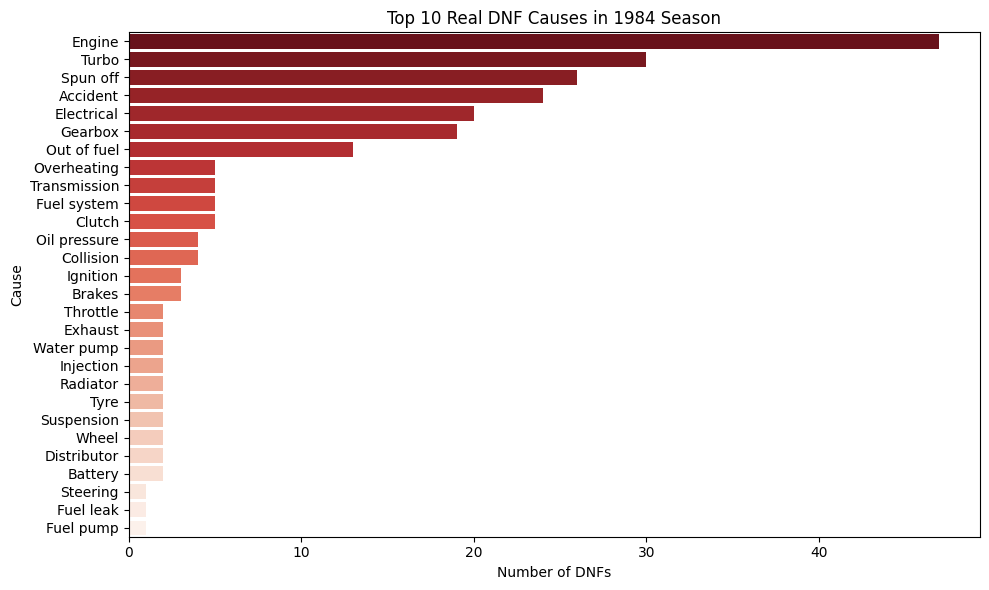

In [38]:


dnfs_in_top_season = dnfs[dnfs['season'] == most_dnf_season]
dnf_causes = dnfs_in_top_season['status'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=dnf_causes.values, y=dnf_causes.index, palette='Reds_r')

plt.title('Top 10 Real DNF Causes in 1984 Season')
plt.xlabel('Number of DNFs')
plt.ylabel('Cause')
plt.tight_layout()
plt.show()


## Worst Performers

C:\Users\Maram allah\AppData\Local\Temp\ipykernel_14380\3014168564.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=worst_performers['positions_diff'], y=worst_performers['driver_name'], palette='Reds_r',ci=None)
C:\Users\Maram allah\AppData\Local\Temp\ipykernel_14380\3014168564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_performers['positions_diff'], y=worst_performers['driver_name'], palette='Reds_r',ci=None)


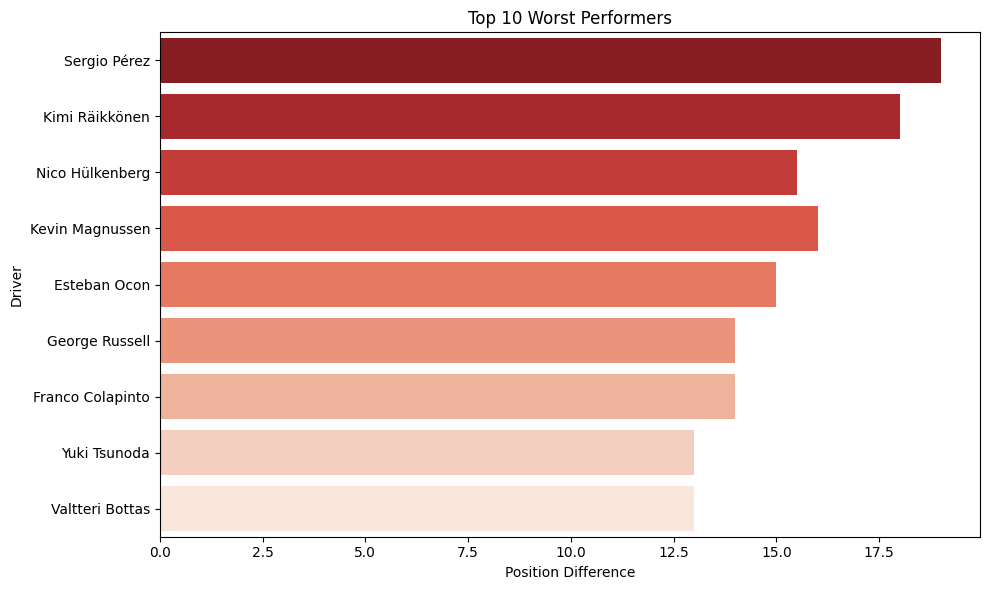

In [39]:

lost_positions = df[(df['positions_diff'] > 0) & (df['finished'])].copy()
worst_performers = lost_positions[['constructor_name', 'driver_name', 'season', 'positions_diff', 'status']] \
    .sort_values(by='positions_diff', ascending=False) \
    .head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=worst_performers['positions_diff'], y=worst_performers['driver_name'], palette='Reds_r',ci=None)

plt.title('Top 10 Worst Performers')
plt.xlabel('Position Difference')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

## Report

Performance Disparities
The gap between Lewis and Sergio's performance suggests systemic issues that require investigation
Reliability Crisis
Engine failures as the primary DNF cause indicates a critical area for investment and development.
Mercedes' Dominance
Mercedes' position as the best-performing team reflects their comprehensive approach to motorsport excellence
Technological Progress
The improvement in finish rates over decades demonstrates the sport's evolution, with better engineering, enhanced safety protocols, and more reliable components contributing to more competitive and complete races.
Suggestions :
Driver Development Program
Implement intensive training and support program for Sergio and worst performance 
Engine Reliability Initiative
Launch immediate investigation into engine failure patterns
Performance Benchmarking
Study Mercedes' operational methods and best practices
